In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Ta se viet ham y=2x-5+random

In [2]:
rs=np.random.RandomState(1)
x=10*rs.rand(50)
y=2*x-5+rs.randn(50)

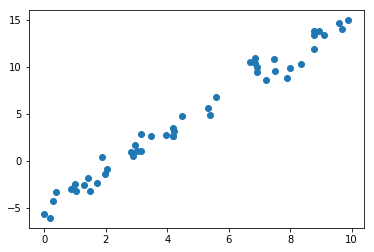

In [4]:
plt.scatter(x,y)

In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(x.reshape(-2,1).shape)

(50, 1)


In [19]:
xpre=np.linspace(1,10,100).reshape(-1,1)

In [20]:
ypre=model.predict(xpre)

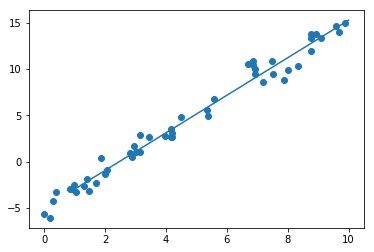

In [21]:
plt.scatter(x,y)
plt.plot(xpre,ypre)

Bây h giả sử dữ liệu không phải đồ thị tuyến tính mà là dạng đồ thị hình sin, bậc 2 bậc 3 ,... thì sao
Ta vãn có thể giải quyết nó bằng cachs chuyển non-linear về dạng linear Dùng #polynomial
Chi tiết đco trang 392-393 pythondatasciencebook

# Polinomial basic funcion

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [38]:
poly_model=make_pipeline(PolynomialFeatures(7),LinearRegression())

x=10*rand,y=sin(x)+0.1*rand

In [39]:
rs=np.random.RandomState(1)
x=10*rs.rand(50)
y=np.sin(x)+0.1*rs.randn(50)
poly_model.fit(x[:, np.newaxis], y)
xfit=np.linspace(0,10,50)
yfit = poly_model.predict(xfit[:, np.newaxis])

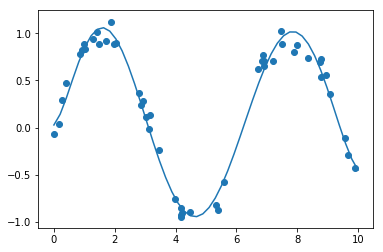

In [40]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

1 cách khác đó là sử dụng Gaussian basis function 

# Gaussian basis function

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,self.width_, axis=1)


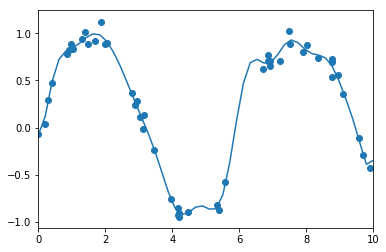

In [45]:
gauss_model = make_pipeline(GaussianFeatures(20),
LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

Ta thử tăng hệ số gaussian xem thế nào, bạn sẽ thấy nó sẽ dẫn đến overfit

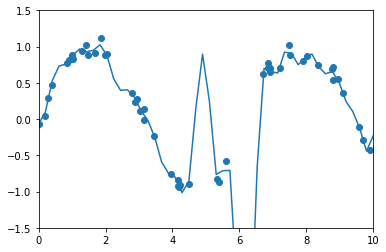

In [46]:
model = make_pipeline(GaussianFeatures(30),
LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

Ta sẽ plot đồ thị hệ số của Gauss tương ứng với vị trí của nó xem ntn

In [49]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,
    model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
    ylabel='coefficient',
    xlim=(0, 10))


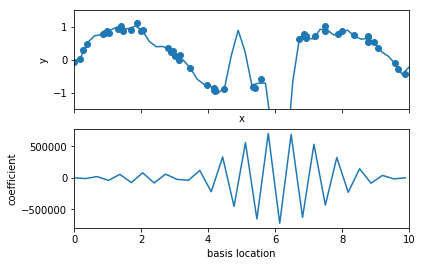

In [50]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

Ta thấy hệ số bị overlap có nghĩa là nó sẽ triệt tiêu nhau (hệ số âm +dương), điều ta cần làm là giảm bớt các đỉnh nhọn
Ta sẽ dùng #regularization,

# regularization
### hàm được gói gọn trong Ridge

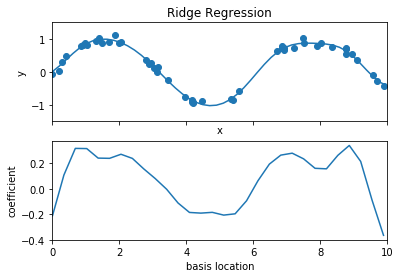

In [55]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')